In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
# load training and test data from csv file
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [19]:
display(train_data)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [20]:
display(test_data)

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,416863ce47,All alone in this old house again. Thanks for...,positive
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive


In [21]:
# drop rows with missing values in the 'text' column
train_data = train_data.dropna(subset=['text'])
test_data = test_data.dropna(subset=['text'])

In [22]:
# extract text and sentiment columns
x_train = train_data['text']
y_train = train_data['sentiment']

x_test = test_data['text']
y_test = test_data['sentiment']

In [23]:
display(x_train)

0                      I`d have responded, if I were going
1            Sooo SAD I will miss you here in San Diego!!!
2                                my boss is bullying me...
3                           what interview! leave me alone
4         Sons of ****, why couldn`t they put them on t...
                               ...                        
27476     wish we could come see u on Denver  husband l...
27477     I`ve wondered about rake to.  The client has ...
27478     Yay good for both of you. Enjoy the break - y...
27479                           But it was worth it  ****.
27480       All this flirting going on - The ATG smiles...
Name: text, Length: 27480, dtype: object

In [24]:
display(y_train)

0         neutral
1        negative
2        negative
3        negative
4        negative
           ...   
27476    negative
27477    negative
27478    positive
27479    positive
27480     neutral
Name: sentiment, Length: 27480, dtype: object

In [25]:
# pre-processing and cleaning the data 
def preprocess(data):
    modified_data = []
    for tweet in data:
        tweet_words = []
        for word in tweet.split():
            if word.startswith('http'):
                word = 'http'
            tweet_words.append(word)
        modified_tweet = " ".join(tweet_words)
        modified_tweet = modified_tweet.lower()
        modified_data.append(modified_tweet)
    return modified_data

x_train = preprocess(x_train)
display(x_train)

['i`d have responded, if i were going',
 'sooo sad i will miss you here in san diego!!!',
 'my boss is bullying me...',
 'what interview! leave me alone',
 'sons of ****, why couldn`t they put them on the releases we already bought',
 'http - some shameless plugging for the best rangers forum on earth',
 '2am feedings for the baby are fun when he is all smiles and coos',
 'soooo high',
 'both of you',
 'journey!? wow... u just became cooler. hehe... (is that possible!?)',
 'as much as i love to be hopeful, i reckon the chances are minimal =p i`m never gonna get my cake and stuff',
 'i really really like the song love story by taylor swift',
 'my sharpie is running dangerously low on ink',
 'i want to go to music tonight but i lost my voice.',
 'test test from the lg env2',
 'uh oh, i am sunburned',
 's`ok, trying to plot alternatives as we speak *sigh*',
 'i`ve been sick for the past few days and thus, my hair looks wierd. if i didnt have a hat on it would look... http',
 'is back home

In [26]:
# a tokenizer is created and fitted on the text data from the training set. 
# tokenizer will be used to convert text into sequences of numbers.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])

# text sequences from both training and test sets are converted into sequences of numbers using the previously fitted tokenizer.
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# sequences are padded to ensure they have the same length
x_train_padded = pad_sequences(x_train_seq)
x_test_padded = pad_sequences(x_test_seq)

# convert data to tensors
x_train_tensor = torch.tensor(x_train_padded).long()
x_test_tensor = torch.tensor(x_test_padded).long()

display(x_train_tensor)

# one-hot encoding - convert categorical data into a binary matrix - negative -> [1,0,0], neutral -> [0,1,0], positive -> [0,0,1]
y_train = pd.get_dummies(y_train, dtype=int).to_numpy()
y_test = pd.get_dummies(y_test, dtype=int).to_numpy()

tensor([[    0,     0,     0,  ...,     1,   150,    48],
        [    0,     0,     0,  ...,    10,  1469,  2304],
        [    0,     0,     0,  ...,     9, 10457,    17],
        ...,
        [    0,     0,     0,  ...,   657,   878,  2851],
        [    0,     0,     0,  ...,    28,   700,     6],
        [    0,     0,     0,  ...,  2305,   235,   668]])

In [27]:
display(y_train)

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]])

In [28]:
# create custom dataset class
class MyDataset(Dataset):
    def __init__(self, data, target):
        self.x = data
        self.y = target

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [29]:
# create DataLoader for training and testing datasets
train_dataset = MyDataset(x_train_tensor, torch.tensor(y_train, dtype=torch.float32))
test_dataset = MyDataset(x_test_tensor, torch.tensor(y_test, dtype=torch.float32))

# specify batch size for training and testing
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [30]:
# Long Short Term Memory (LSTM) model 
# class LSTM(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, dropout_rate):
#         super(LSTM, self).__init__()
#         # converts input indices to dense vectors of fixed size (hidden_size)
#         self.embedding = nn.Embedding(input_size, hidden_size)
#         # lstm layer
#         self.lstm = nn.LSTM(hidden_size, hidden_size)
#         self.dropout = nn.Dropout(dropout_rate)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         # convert input indices to dense vectors
#         embedded = self.embedding(x)
#         # process the embedded sequence, change the order of dims for lstm layer
#         lstm_out, _ = self.lstm(embedded.permute(1, 0, 2))
#         # apply dropout to the output of the LSTM
#         lstm_out = self.dropout(lstm_out[-1, :, :])
#         # final output
#         output = self.fc(lstm_out)
#         return output

# Gated Recurrent Unit (GRU) model
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU, self).__init__()
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        embedded = self.embedding(x)
        gru_out, _ = self.gru(embedded.permute(1, 0, 2))
        output = self.fc(gru_out[-1, :, :])
        return output

In [31]:
# device = torch.device("mps")
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

# specify parameters
dropout_rate = 0.1
input_size = len(tokenizer.word_index) + 1
hidden_size = 64
output_size = len(set(train_data['sentiment']))

cpu


In [32]:
# LSTM
# model = LSTM(input_size, hidden_size, output_size, dropout_rate)

#GRU
model = GRU(input_size, hidden_size, output_size)

# send model to device
model = model.to(device)

In [33]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

/opt/homebrew/Caskroom/miniconda/base/envs/ai_mod/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
# training loop
num_epochs = 20
losses = []

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs.long())
        loss = criterion(outputs, labels.argmax(dim=1))
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 1/20, Loss: 0.7067
Epoch 2/20, Loss: 0.5621
Epoch 3/20, Loss: 0.4839
Epoch 4/20, Loss: 0.3071
Epoch 5/20, Loss: 0.3924
Epoch 6/20, Loss: 0.5552
Epoch 7/20, Loss: 0.2699
Epoch 8/20, Loss: 0.0194
Epoch 9/20, Loss: 0.0205
Epoch 10/20, Loss: 0.0277
Epoch 11/20, Loss: 0.0003
Epoch 12/20, Loss: 0.0049
Epoch 13/20, Loss: 0.0017
Epoch 14/20, Loss: 0.0105
Epoch 15/20, Loss: 0.0595
Epoch 16/20, Loss: 0.2605
Epoch 17/20, Loss: 0.0077
Epoch 18/20, Loss: 0.0214
Epoch 19/20, Loss: 0.0038
Epoch 20/20, Loss: 0.0012


In [35]:
# save model 
save_path = './rnnmodel.pth'
torch.save(model.state_dict(), save_path)

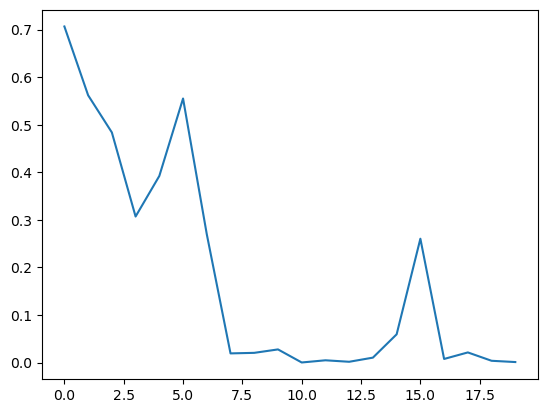

In [36]:
# plot losses during training
plt.plot(losses)

In [37]:
# load saved model
model.load_state_dict(torch.load(save_path))

<All keys matched successfully>

In [38]:
# evaluation loop
model.eval()
with torch.no_grad():
    total_correct = 0
    total_samples = 0
    for inputs, labels in test_loader:
        outputs = model(inputs.long())
        _, predicted = torch.max(outputs, 1)

        # print predicted and ground truth labels
        # print("Predicted:", predicted)
        # print("Ground Truth:", torch.argmax(labels, dim=1))

        total_samples += labels.size(0)
        total_correct += torch.eq(predicted, torch.argmax(labels, dim=1)).sum().item()

    accuracy = total_correct / total_samples
    print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6709


In [39]:
input_text = "this class is okay"
input_seq = tokenizer.texts_to_sequences([input_text])
input_padded = pad_sequences(input_seq)
input_tensor = torch.tensor(input_padded).long()

model.eval()

with torch.no_grad():
    # ensure input tensor is on the same device as your model
    input_tensor = input_tensor.to(device)

    # forward pass
    output = model(input_tensor)

    # get the predicted sentiment
    _, predicted_class = torch.max(output, 1)
    # predicted_sentiment = classes[predicted_class.item()]

class_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
predicted_class_index = predicted_class.item()
predicted_sentiment = class_mapping[predicted_class_index]
print(f"Predicted Sentiment: {predicted_sentiment}")

Predicted Sentiment: neutral
